# Capstone Project - The Battle of Neighborhoods (Week 2)

### Download of all the dependencies that we need

In [9]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import folium # plotting library

from bs4 import BeautifulSoup
from IPython.display import display_html
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

print('Libraries imported.')

Libraries imported.


### Scraping the Wikipedia page for the list of boroughs of Nantes Metropolis

In [10]:
# Download data and parse it:
request = requests.get('https://fr.wikipedia.org/wiki/Nantes_M%C3%A9tropole')
soup = BeautifulSoup(request.text, 'html.parser')
# First remove Falsey values
table_soup = soup.find_all('table')
filtered_table_soup = [table for table in table_soup if table.caption is not None]

required_table = None

for table in filtered_table_soup:
    if str(table.caption.string).strip() == 'Liste des communes de l’intercommunalité':
        required_table = table
        break
# Then display the table
table_str =  str(table)
display_html(table_str, raw=True)

Nom,Code Insee,Gentilé,Superficie (km2),Population (dernière pop. légale),Densité (hab./km2)
Nantes(siège),44109,Nantais,"65,19",‍314 138 (2018),4 819
Basse-Goulaine,44009,Goulainais,"13,74",‍9 093 (2018),662
Bouaye,44018,Boscéens,"13,83",‍7 914 (2018),572
Bouguenais,44020,Bouguenaisiens,"31,5",‍19 658 (2018),624
Brains,44024,Brennois,"15,31",‍2 836 (2018),185
Carquefou,44026,Carquefoliens,"43,42",‍20 032 (2018),461
La Chapelle-sur-Erdre,44035,Chapelains,"33,42",‍19 526 (2018),584
Couëron,44047,Coueronnais,"44,03",‍21 862 (2018),497
Indre,44074,Indrais,"4,72",‍4 037 (2018),855
Mauves-sur-Loire,44094,Malviens,"14,75",‍3 230 (2018),219


## Data Preparation

In [11]:
# The HTML table is converted to a Pandas DataFrame
df_init = pd.read_html(table_str, flavor= 'html5lib')
df = df_init[0]
df.head()

,Nom,Code Insee,Gentilé,Superficie (km2),Population (dernière pop. légale),Densité (hab./km2)
0,Nantes(siège),44109,Nantais,6519,314 138 (2018),4 819
1,Basse-Goulaine,44009,Goulainais,1374,9 093 (2018),662
2,Bouaye,44018,Boscéens,1383,7 914 (2018),572
3,Bouguenais,44020,Bouguenaisiens,315,19 658 (2018),624
4,Brains,44024,Brennois,1531,2 836 (2018),185


## Data Cleaning

In [12]:
# We will drop the columns that we don't want to keep :
columns_to_keep = ['Nom', 'Code Insee']
df1 = df.reindex(columns=columns_to_keep)
# df1.head()

#We rename 'Nantes(siège)' to 'Nantes'
df1 = df1.replace(['Nantes(siège)'], 'Nantes')

# We will only keep the boroughs that are adjacent to the center of Nantes : 
boroughs_to_keep = ['Nantes', 'Saint-Herblain', 'Rezé']
df2 = df1[df1['Nom'].isin(boroughs_to_keep)]
df2

,Nom,Code Insee
0,Nantes,44109
13,Rezé,44143
15,Saint-Herblain,44162


### Importing the geojson file containing the Latitudes and Longitudes for neighbourhoods in Nantes Metropolis

In [13]:
import geopandas as gpd
geo = gpd.read_file('data/geo-Nantes.geojson')

#We rename 'St-Herblain' to 'Saint-Herblain'
geo = geo.replace(['St-Herblain'], 'Saint-Herblain')

#We keep only also in this dataframe the boroughs that we want
geo = geo[geo['libcom'].isin(boroughs_to_keep)]

# We will drop the columns that we don't want to keep :
columns_to_keep2 = ['nom', 'libcom', 'geometry']
geo = geo.reindex(columns=columns_to_keep2)

geo.head()

,nom,libcom,geometry
0,La Houssais,Rezé,"POLYGON ((-1.56017 47.16717, -1.56012 47.16745..."
1,Ragon,Rezé,"POLYGON ((-1.54775 47.14881, -1.54781 47.14890..."
2,Dervallières - Zola,Nantes,"POLYGON ((-1.57102 47.20608, -1.57244 47.20712..."
3,Malakoff - Saint-Donatien,Nantes,"POLYGON ((-1.53871 47.21124, -1.53871 47.21124..."
4,Pont Rousseau,Rezé,"POLYGON ((-1.55336 47.18541, -1.55347 47.18549..."


### Merge the two DataFrames

In [16]:
# We rename a colum in our df2 in order to have the columns having the same name in order to join them
df3 = df2.rename(columns={'Nom': 'libcom'})
df_geo = pd.merge(df3, geo, on='libcom')
df_geo.head()

,libcom,Code Insee,nom,geometry
0,Nantes,44109,Dervallières - Zola,"POLYGON ((-1.57102 47.20608, -1.57244 47.20712..."
1,Nantes,44109,Malakoff - Saint-Donatien,"POLYGON ((-1.53871 47.21124, -1.53871 47.21124..."
2,Nantes,44109,Nantes Nord,"POLYGON ((-1.57686 47.25480, -1.57692 47.25487..."
3,Nantes,44109,Doulon - Bottière,"POLYGON ((-1.51491 47.21645, -1.51545 47.21767..."
4,Nantes,44109,Nantes Sud,"POLYGON ((-1.51813 47.18059, -1.51813 47.18059..."


In [18]:
df_geo = df_geo.set_geometry('geometry', crs=4326)
#Find the center point
df_geo['Center_point'] = df_geo['geometry'].centroid

#Extract lat and lon from the centerpoint
df_geo["lat"] = df_geo.Center_point.map(lambda p: p.x)
df_geo["lon"] = df_geo.Center_point.map(lambda p: p.y)
df_geo.head()

<ipython-input-18-ad3b883c098e>:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df_geo['Center_point'] = df_geo['geometry'].centroid


,libcom,Code Insee,nom,geometry,Center_point,lat,lon
0,Nantes,44109,Dervallières - Zola,"POLYGON ((-1.57102 47.20608, -1.57244 47.20712...",POINT (-1.58934 47.21624),-1.589340,47.216244
1,Nantes,44109,Malakoff - Saint-Donatien,"POLYGON ((-1.53871 47.21124, -1.53871 47.21124...",POINT (-1.53563 47.22282),-1.535631,47.222819
2,Nantes,44109,Nantes Nord,"POLYGON ((-1.57686 47.25480, -1.57692 47.25487...",POINT (-1.56547 47.25750),-1.565468,47.257496
3,Nantes,44109,Doulon - Bottière,"POLYGON ((-1.51491 47.21645, -1.51545 47.21767...",POINT (-1.50656 47.23706),-1.506559,47.237059
4,Nantes,44109,Nantes Sud,"POLYGON ((-1.51813 47.18059, -1.51813 47.18059...",POINT (-1.53047 47.19162),-1.530468,47.191625


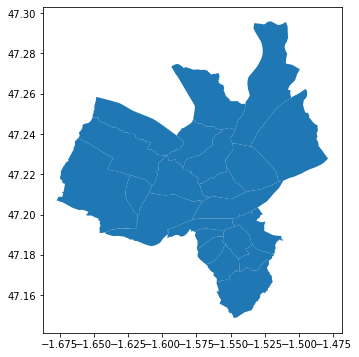

In [19]:
import matplotlib.pyplot as plt

df_geo.plot(figsize=(6, 6))
plt.show()

### Add marker showing the area and length of each borough

In [51]:
map_nantes = folium.Map(location=[47.30, -1.475], zoom_start=11, tiles='CartoDB positron')

# add markers to map
for _, r in df_geo.iterrows():
    label = '{}, {}'.format(r['nom'], r['libcom'])
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'fillColor': 'orange'})
    folium.Popup(label).add_to(geo_j)
    folium.Marker(
        location=[r['lon'], r['lat']],
        popup=label).add_to(geo_j)  
    geo_j.add_to(map_nantes)

# map_nantes.save('map_nantes.html')

display(map_nantes)